<a href="https://colab.research.google.com/github/BedeGrieco/CanCode-Python-Data-Analytics-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#####################################################
#                                                   #
# Python and Data Analytics Fall 2022 Final Project #
#                                                   #
#               Gabriel Bede Grieco                 #
#                                                   #
#####################################################

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from textwrap import wrap

# For Data Distribution, filters out sales lower than 10,000 (0.01m) (sourced from https://www.w3schools.com/python/numpy/numpy_array_filter.asp)
def filter_low_sales(datalist):
  filtered_data = []
  for i in datalist:
    if i < 0.01:
      filtered_data.append(False)
    else:
      filtered_data.append(True)
  # Returns all items that were marked true
  return datalist[filtered_data]

# Put the csv data in the location below into our dataframe
DATA_LOCATION = "https://raw.githubusercontent.com/BedeGrieco/CanCode-Python-Data-Analytics-Final-Project/main/vgsales.csv"

data = pd.read_csv(DATA_LOCATION)

#######################################################
#                                                     #
# Print the Data staticstics for all relevant columns #
#                                                     #
#######################################################

print("Data Statistics")
for columnname, columndata in data.iteritems():
  # Skip the Rank column
  if (columnname != 'Rank'):
    # bold/underline code referenced from https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python
    print("\n" + '\033[1m' + '\033[4m' + columnname + '\033[0m')

  # Year has mean, median, and mode, max, and min
  if (columnname == 'Year'):
    print("Mean (Rounded to Nearest Year): " + str(round(columndata.mean())))
    print("Median: " + "{:.0f}".format(columndata.median()))
    modestring = 'Mode: '
    # There can be multiple modes, so we need to get each one and put it in the string to print
    for modevalue in columndata.mode():
      modestring += "{:.0f}".format(modevalue) + ','
    modestring = modestring.rstrip(',')
    print(modestring)
    print("Min: " + "{:.0f}".format(columndata.min()))
    print("Max: " + "{:.0f}".format(columndata.max()))
  # All other mean-median-max-mins are sales, so adding an m at the end should clarify that these numbers are in millions
  if (columndata.dtype == 'int64' or columndata.dtype == 'float64') and (columnname != 'Rank' and columnname != 'Year'):
    print("Mean: " + "{:.2f}".format(columndata.mean()) + 'm')
    print("Median: " + "{:.2f}".format(columndata.median()) + 'm')
    print("Min: " + "{:.2f}".format(columndata.min()))
    print("Max: " + "{:.2f}".format(columndata.max()))
  # This is for name, platform, genre, and publisher. A name can come up multiple times if it's on multiple platforms
  if (columndata.dtype == 'object' or (columndata.dtype == 'int64' and columndata.value_counts().idxmax() > 1)) and columnname != 'Year':
    modestring = 'Mode: '
    for modevalue in columndata.mode():
      modestring += str(modevalue) + ','
    modestring = modestring.rstrip(',')
    print(modestring)

Data Statistics

Name
Mode: Need for Speed: Most Wanted

Platform
Mode: DS

Year
Mean (Rounded to Nearest Year): 2006
Median: 2007
Mode: 2009
Min: 1980
Max: 2020

Genre
Mode: Action

Publisher
Mode: Electronic Arts

NA_Sales
Mean: 0.26m
Median: 0.08m
Min: 0.00
Max: 41.49

EU_Sales
Mean: 0.15m
Median: 0.02m
Min: 0.00
Max: 29.02

JP_Sales
Mean: 0.08m
Median: 0.00m
Min: 0.00
Max: 10.22

Other_Sales
Mean: 0.05m
Median: 0.01m
Min: 0.00
Max: 10.57

Global_Sales
Mean: 0.54m
Median: 0.17m
Min: 0.01
Max: 82.74


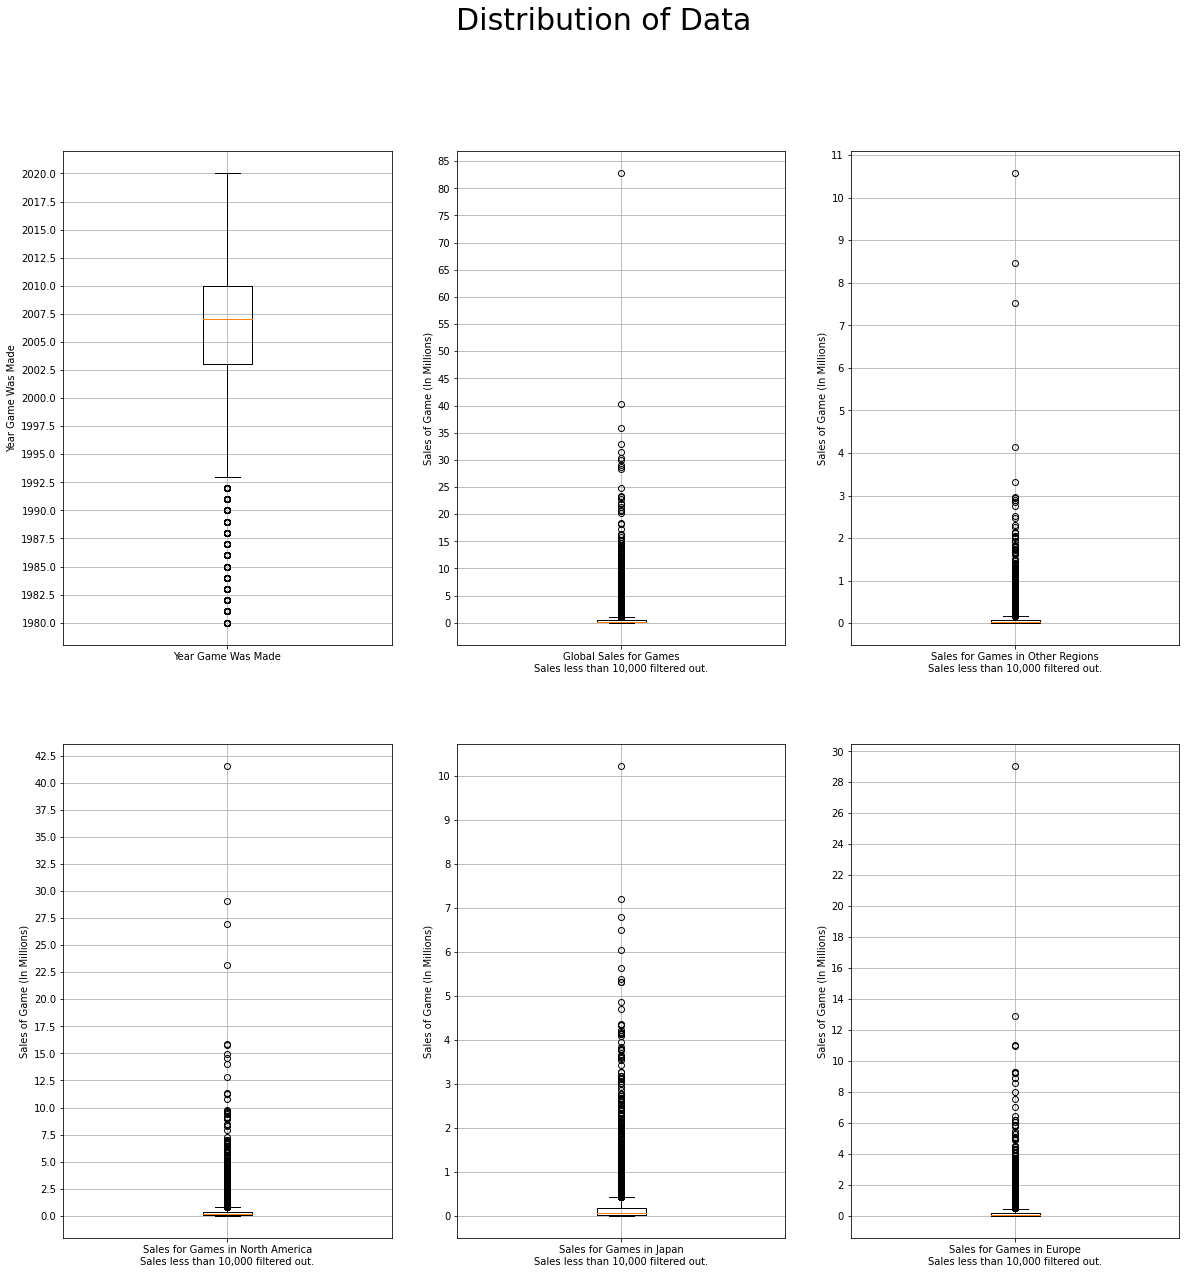

In [ ]:
#####################################
#                                   #
# Distribution of Relevant Columns  #
#                                   #
#####################################

fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(20,20))

year = np.array(data.Year)

# filter out entries with missing years
year = year[~np.isnan(year)]

# filter out games with less than 10,000 (0.01m) copies
global_sales = filter_low_sales(np.array(data.Global_Sales))
other_sales = filter_low_sales(np.array(data.Other_Sales))
na_sales = filter_low_sales(np.array(data.NA_Sales))
jp_sales = filter_low_sales(np.array(data.JP_Sales))
eu_sales = filter_low_sales(np.array(data.EU_Sales))

# Create boxplots for each of the six columns
ax1[0].boxplot(year)
ax1[0].set_ylabel('Year Game Was Made')
ax1[0].set_xticklabels(['Year Game Was Made'])
ax1[0].grid(visible=True, which='major', axis='both')
ax1[0].locator_params(axis='y', nbins=18)

ax1[1].boxplot(global_sales)
ax1[1].set_ylabel('Sales of Game (In Millions)')
ax1[1].set_xticklabels(['Global Sales for Games\nSales less than 10,000 filtered out.'])
ax1[1].grid(visible=True, which='major', axis='both')
ax1[1].locator_params(axis='y', nbins=20)

ax1[2].boxplot(other_sales)
ax1[2].set_ylabel('Sales of Game (In Millions)')
ax1[2].set_xticklabels(['Sales for Games in Other Regions\nSales less than 10,000 filtered out.'])
ax1[2].grid(visible=True, which='major', axis='both')
ax1[2].locator_params(axis='y', nbins=20)

ax2[0].boxplot(na_sales)
ax2[0].set_ylabel('Sales of Game (In Millions)')
ax2[0].set_xticklabels(['Sales for Games in North America\nSales less than 10,000 filtered out.'])
ax2[0].grid(visible=True, which='major', axis='both')
ax2[0].locator_params(axis='y', nbins=20)

ax2[1].boxplot(jp_sales)
ax2[1].set_ylabel('Sales of Game (In Millions)')
ax2[1].set_xticklabels(['Sales for Games in Japan\nSales less than 10,000 filtered out.'])
ax2[1].grid(visible=True, which='major', axis='both')
ax2[1].locator_params(axis='y', nbins=20)

ax2[2].boxplot(eu_sales)
ax2[2].set_ylabel('Sales of Game (In Millions)')
ax2[2].set_xticklabels(['Sales for Games in Europe\nSales less than 10,000 filtered out.'])
ax2[2].grid(visible=True, which='major', axis='both')
ax2[2].locator_params(axis='y', nbins=20)

plt.suptitle('Distribution of Data', size=30)
plt.title
plt.show()

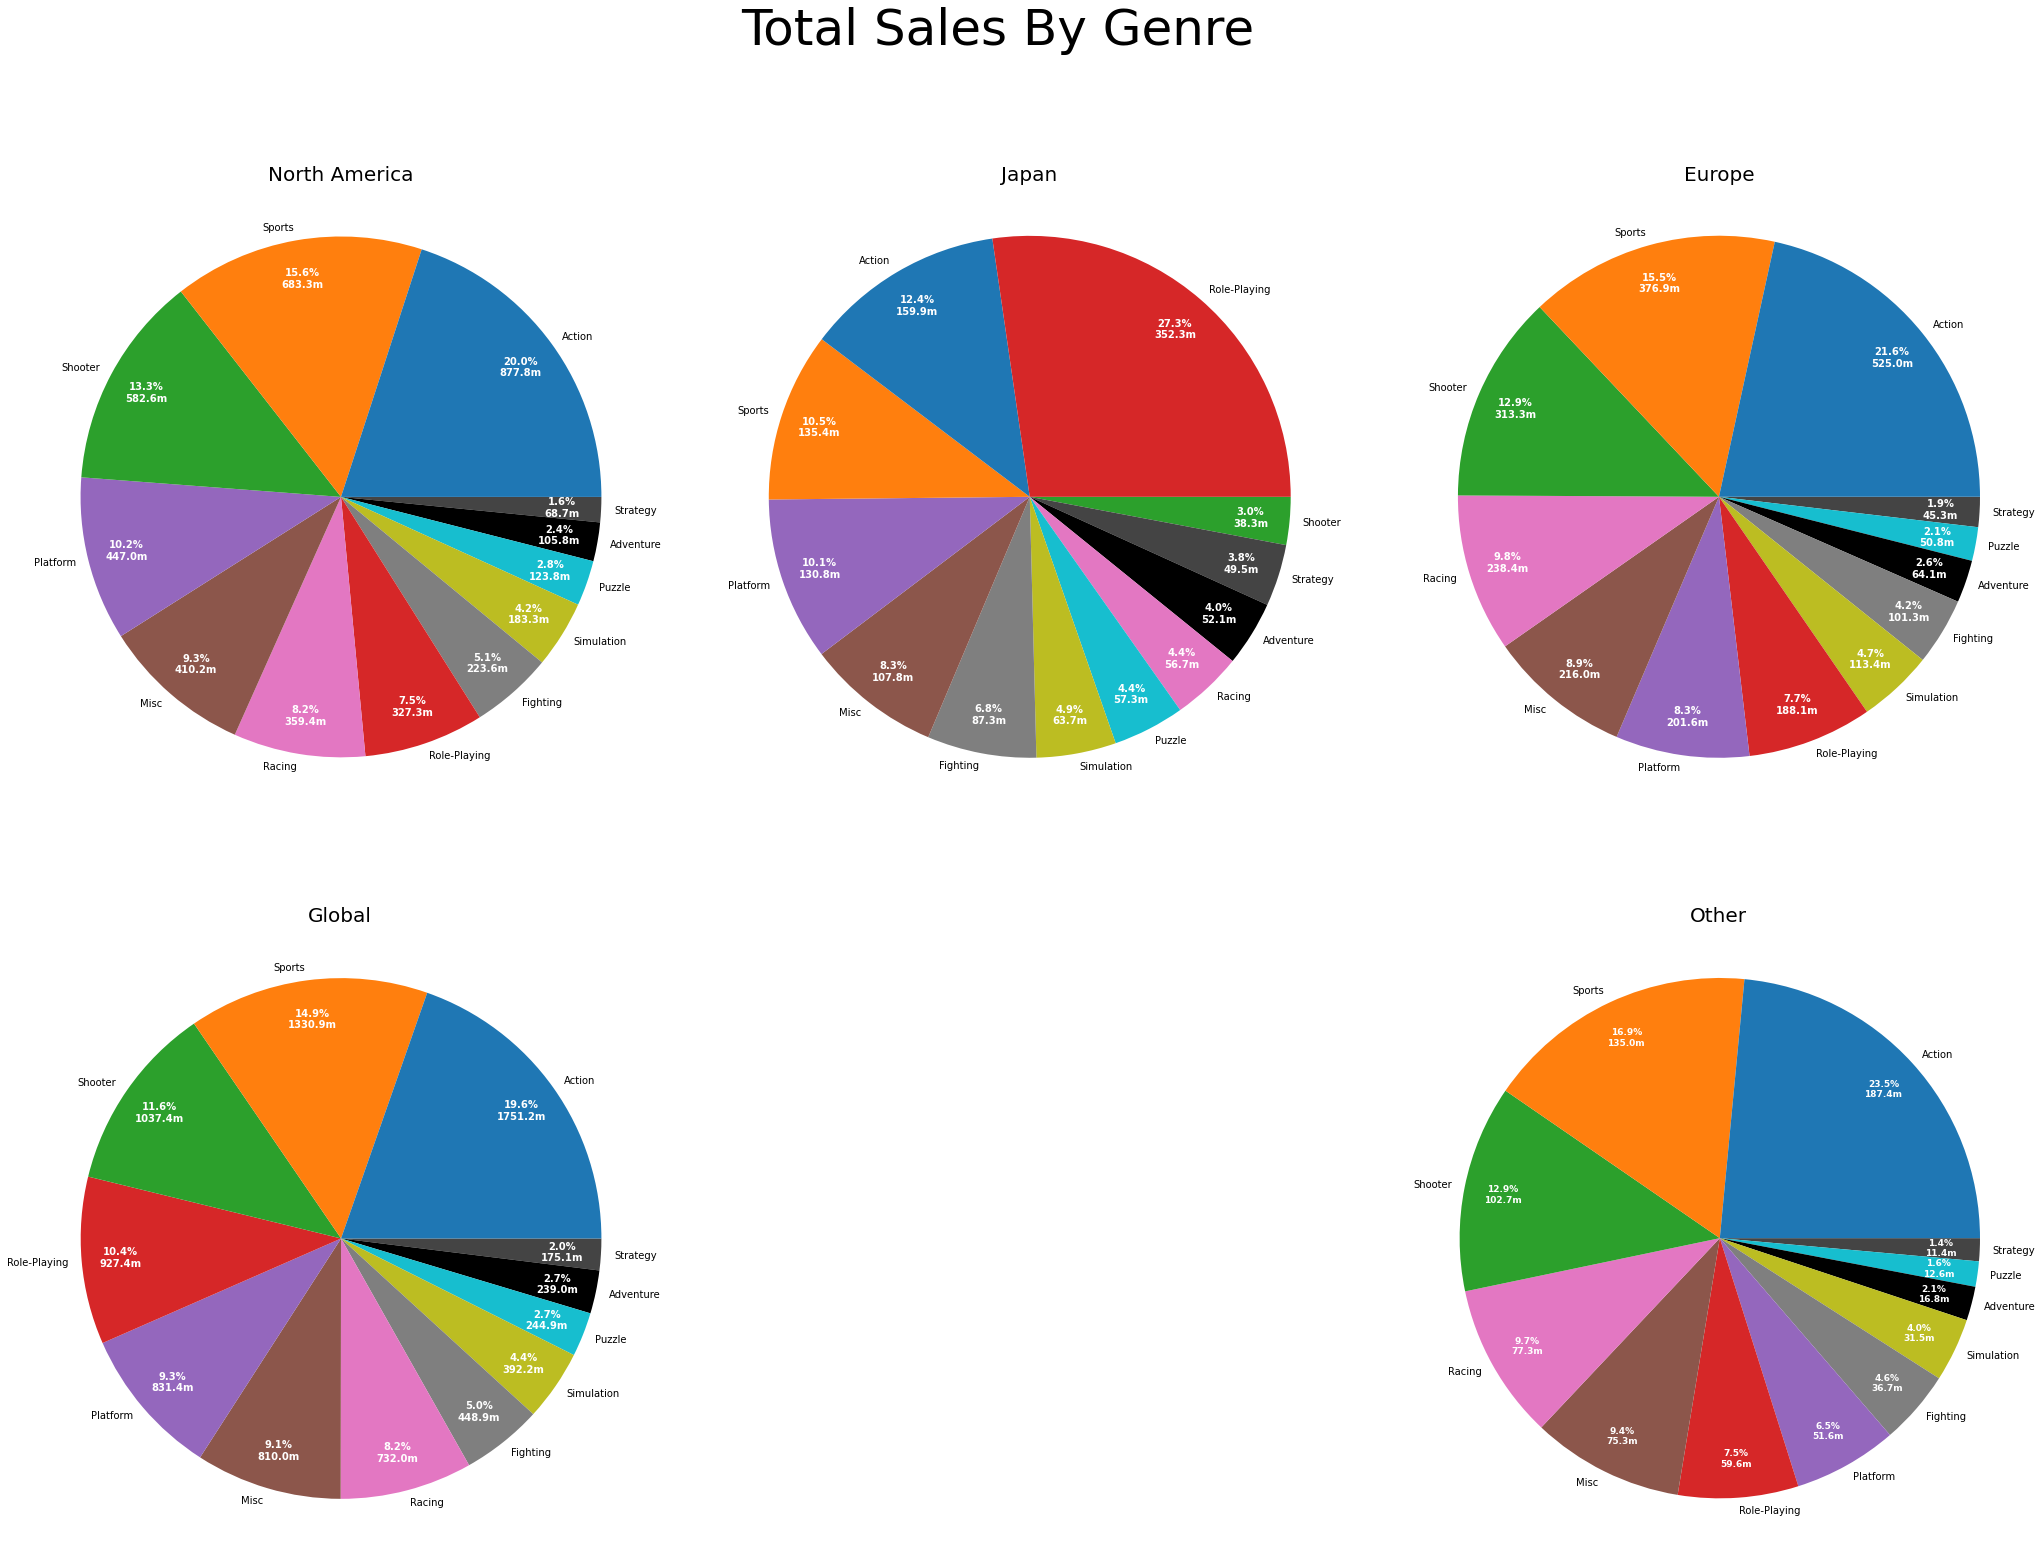

In [ ]:
###################################
#                                 #
# Total Video Game Sales by Genre #
#                                 #
###################################

# Group items by genre
genres = data.groupby('Genre', sort=False)

# Get the total sum of sales for each genre
GL = genres['Global_Sales'].sum()
GL = GL.sort_values()
NA = genres['NA_Sales'].sum()
NA = NA.sort_values()
EU = genres['EU_Sales'].sum()
EU = EU.sort_values()
JP = genres['JP_Sales'].sum()
JP = JP.sort_values()
OT = genres['Other_Sales'].sum()
OT = OT.sort_values()

# Creating autocpt arguments to make the pie chart more
# readable/meaningful (code sourced from https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/)
def func(pct, allvalues):
    absolute = pct / 100.*np.sum(allvalues)
    return "{:.1f}%\n{:.1f}m".format(pct, absolute)

# 3 columns, 2 rows of charts
fig, (ax1, ax2) = plt.subplots(2,3, figsize = (35,25))

# Create pie charts for all five regions (the bottom middle area is blank)

# Create colors to match the genre's position on the chart, as colors are position dependant
# Action, Sports, Shooting, Role-Playing, Platform, Misc, Racing, Fighting, Simulation, Puzzle, Adventure, Strategy
GLColors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#000000', '#444444']
patches, texts, pcts = ax2[0].pie(GL, 
        autopct = lambda pct: func(pct, GL),
        labels=GL.index,
        colors=GLColors[::-1],
        labeldistance=1.05,
        pctdistance=.85,
        counterclock=False)
plt.setp(pcts, color='white', fontweight='bold')
ax2[0].axis('equal')
ax2[0].set_title("Global", size=20)

# Action, Sports, Shooting, Racing, Misc, Role-Playing, Platform, Fighting, Simulation, Adventure, Puzzle, Strategy
OTColors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2', '#8c564b', '#d62728', '#9467bd', '#7f7f7f', '#bcbd22', '#000000', '#17becf', '#444444']
patches, texts, pcts = ax2[2].pie(OT, 
        autopct = lambda pct: func(pct, OT),
        labels=OT.index,
        colors=OTColors[::-1],
        labeldistance=1.05,
        pctdistance=.85,
        counterclock=False)
plt.setp(pcts, color='white', fontweight='bold', fontsize=9)
ax2[2].axis('equal')
ax2[2].set_title("Other", size=20)
ax2[1].axis('off')

# Action, Sports, Shooting, Platform, Misc, Racing, Role-Playing, Fighting, Simulation, Puzzle, Adventure, Strategy
NAColors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#d62728', '#7f7f7f', '#bcbd22', '#17becf', '#000000', '#444444']
patches, texts, pcts = ax1[0].pie(NA, 
        autopct = lambda pct: func(pct, NA),
        labels=NA.index,
        colors=NAColors[::-1],
        labeldistance=1.05,
        pctdistance=.85,
        counterclock=False)
plt.setp(pcts, color='white', fontweight='bold')
ax1[0].axis('equal')
ax1[0].set_title("North America", size=20)

# Role-Playing, Action, Sports, Platform, Misc, Fighting, Simulation, Puzzle, Racing, Adventure, Strategy, Shooting
JPColors = ['#d62728', '#1f77b4', '#ff7f0e', '#9467bd', '#8c564b', '#7f7f7f', '#bcbd22', '#17becf', '#e377c2', '#000000', '#444444', '#2ca02c']
patches, texts, pcts = ax1[1].pie(JP, 
        autopct = lambda pct: func(pct, JP),
        labels=JP.index,
        colors=JPColors[::-1],
        labeldistance=1.05,
        pctdistance=.85,
        counterclock=False)
plt.setp(pcts, color='white', fontweight='bold')
ax1[1].axis('equal')
ax1[1].set_title("Japan", size=20)

# Action, Sports, Shooting, Racing, Misc, Platform, Role-Playing, Simulation, Fighting, Adventure, Puzzle, Strategy
EUColors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2', '#8c564b', '#9467bd', '#d62728', '#bcbd22', '#7f7f7f', '#000000', '#17becf', '#444444']
patches, texts, pcts = ax1[2].pie(EU, 
        autopct = lambda pct: func(pct, EU),
        labels=EU.index,
        colors=EUColors[::-1],
        labeldistance=1.05,
        pctdistance=.85,
        counterclock=False)
plt.setp(pcts, color='white', fontweight='bold', fontsize=10)
ax1[2].axis('equal')
ax1[2].set_title("Europe", size=20)

plt.suptitle("Total Sales By Genre", size=50)
plt.show()

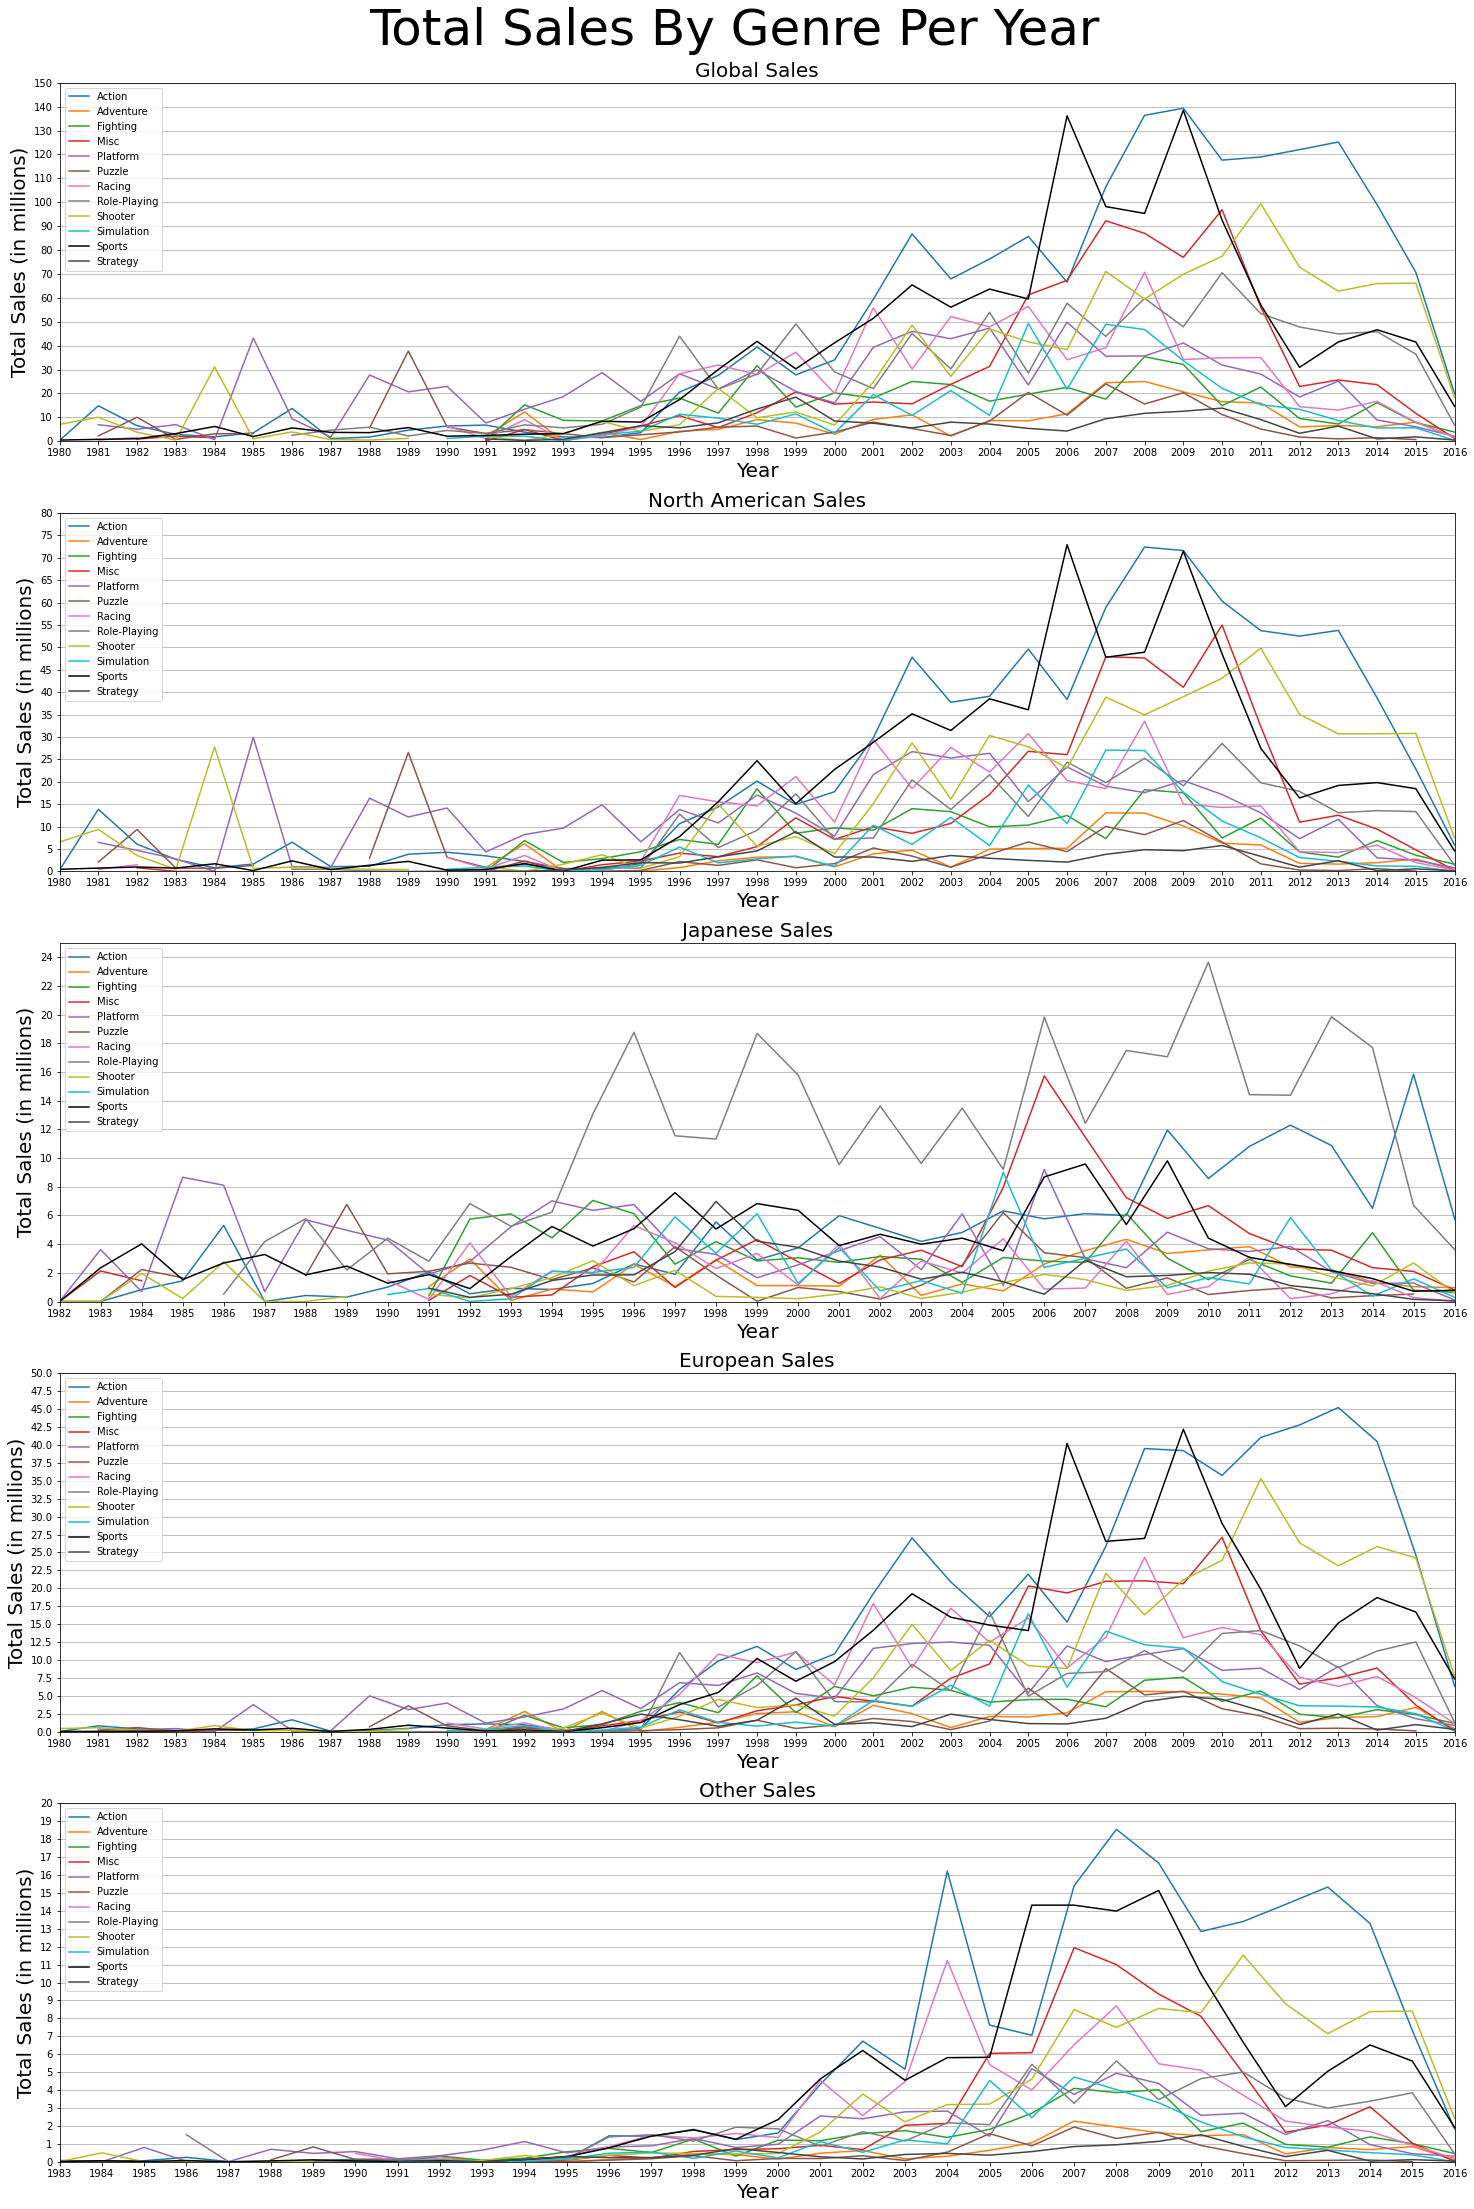

In [ ]:
#####################################################
#                                                   #
# Total Video Game Sales by Genre per year (trends) #
#                                                   #
#####################################################

# Group by Year, than Genre
peryear = data.groupby(['Year','Genre'], sort=True)

# Set range of years to include 1980 to 2016
years = np.arange(start=1980, stop=2017, step=1)

# Get the total sales of each genre per year, than unstack
# the data so it's in the proper structure for the plot
GL = peryear.sum()['Global_Sales'].unstack()
NA = peryear.sum()['NA_Sales'].unstack()
EU = peryear.sum()['EU_Sales'].unstack()
JP = peryear.sum()['JP_Sales'].unstack()
OT = peryear.sum()['Other_Sales'].unstack()

# Five charts stacked vertically
fig, axs = plt.subplots(5, 1, figsize=(25,35))

# Defines the colors to use for each plot per genre
GLColors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#000000', '#444444']

# Plot each line per Genre, and set the color for it
c = 0
for i in list(GL):
  axs[0].plot(GL.index, GL[i], label=i, color=GLColors[c])
  c += 1
axs[0].legend()
axs[0].set_xticks(years)
axs[0].set_xlim([1980, 2016])
axs[0].set_ylim(0,150)
axs[0].locator_params(axis='y', nbins=20)
axs[0].locator_params(axis='x', nbins=40)
axs[0].set_xlabel("Year", size=20)
axs[0].set_ylabel("Total Sales (in millions)", size=20)
axs[0].set_title('Global Sales', size=20)
axs[0].grid(visible=True, which='major', axis='y')

c = 0
for i in list(NA):
  axs[1].plot(NA.index, NA[i], label=i, color=GLColors[c])
  c += 1
axs[1].legend()
axs[1].set_xticks(years)
axs[1].set_xlim([1980, 2016])
axs[1].set_ylim(0,80)
axs[1].locator_params(axis='y', nbins=20)
axs[1].locator_params(axis='x', nbins=40)
axs[1].set_xlabel("Year", size=20)
axs[1].set_ylabel("Total Sales (in millions)", size=20)
axs[1].set_title('Global Sales', size=20)
axs[1].set_title('North American Sales', size=20)
axs[1].grid(visible=True, which='major', axis='y')

c = 0
for i in list(JP):
  axs[2].plot(JP.index, JP[i], label=i, color=GLColors[c])
  c += 1
axs[2].legend()
axs[2].set_xticks(years)
axs[2].set_xlim([1982, 2016])
axs[2].set_ylim(0,25)
axs[2].locator_params(axis='y', nbins=20)
axs[2].locator_params(axis='x', nbins=40)
axs[2].set_xlabel("Year", size=20)
axs[2].set_ylabel("Total Sales (in millions)", size=20)
axs[2].set_title('Global Sales', size=20)
axs[2].set_title('Japanese Sales', size=20)
axs[2].grid(visible=True, which='major', axis='y')

c = 0
for i in list(EU):
  axs[3].plot(EU.index, EU[i], label=i, color=GLColors[c])
  c += 1
axs[3].legend()
axs[3].set_xticks(years)
axs[3].set_xlim([1980, 2016])
axs[3].set_ylim(0,50)
axs[3].locator_params(axis='y', nbins=20)
axs[3].locator_params(axis='x', nbins=40)
axs[3].set_xlabel("Year", size=20)
axs[3].set_ylabel("Total Sales (in millions)", size=20)
axs[3].set_title('Global Sales', size=20)
axs[3].set_title('European Sales', size=20)
axs[3].grid(visible=True, which='major', axis='y')

c = 0
for i in list(OT):
  axs[4].plot(OT.index, OT[i], label=i, color=GLColors[c])
  c += 1
axs[4].legend()
axs[4].set_xticks(years)
axs[4].set_xlim([1983, 2016])
axs[4].set_ylim(0,20)
axs[4].locator_params(axis='y', nbins=20)
axs[4].locator_params(axis='x', nbins=40)
axs[4].set_xlabel("Year", size=20)
axs[4].set_ylabel("Total Sales (in millions)", size=20)
axs[4].set_title('Global Sales', size=20)
axs[4].set_title('Other Sales', size=20)
axs[4].grid(visible=True, which='major', axis='y')

plt.suptitle("Total Sales By Genre Per Year", size=50)
plt.subplots_adjust(top=0.95)
plt.show()


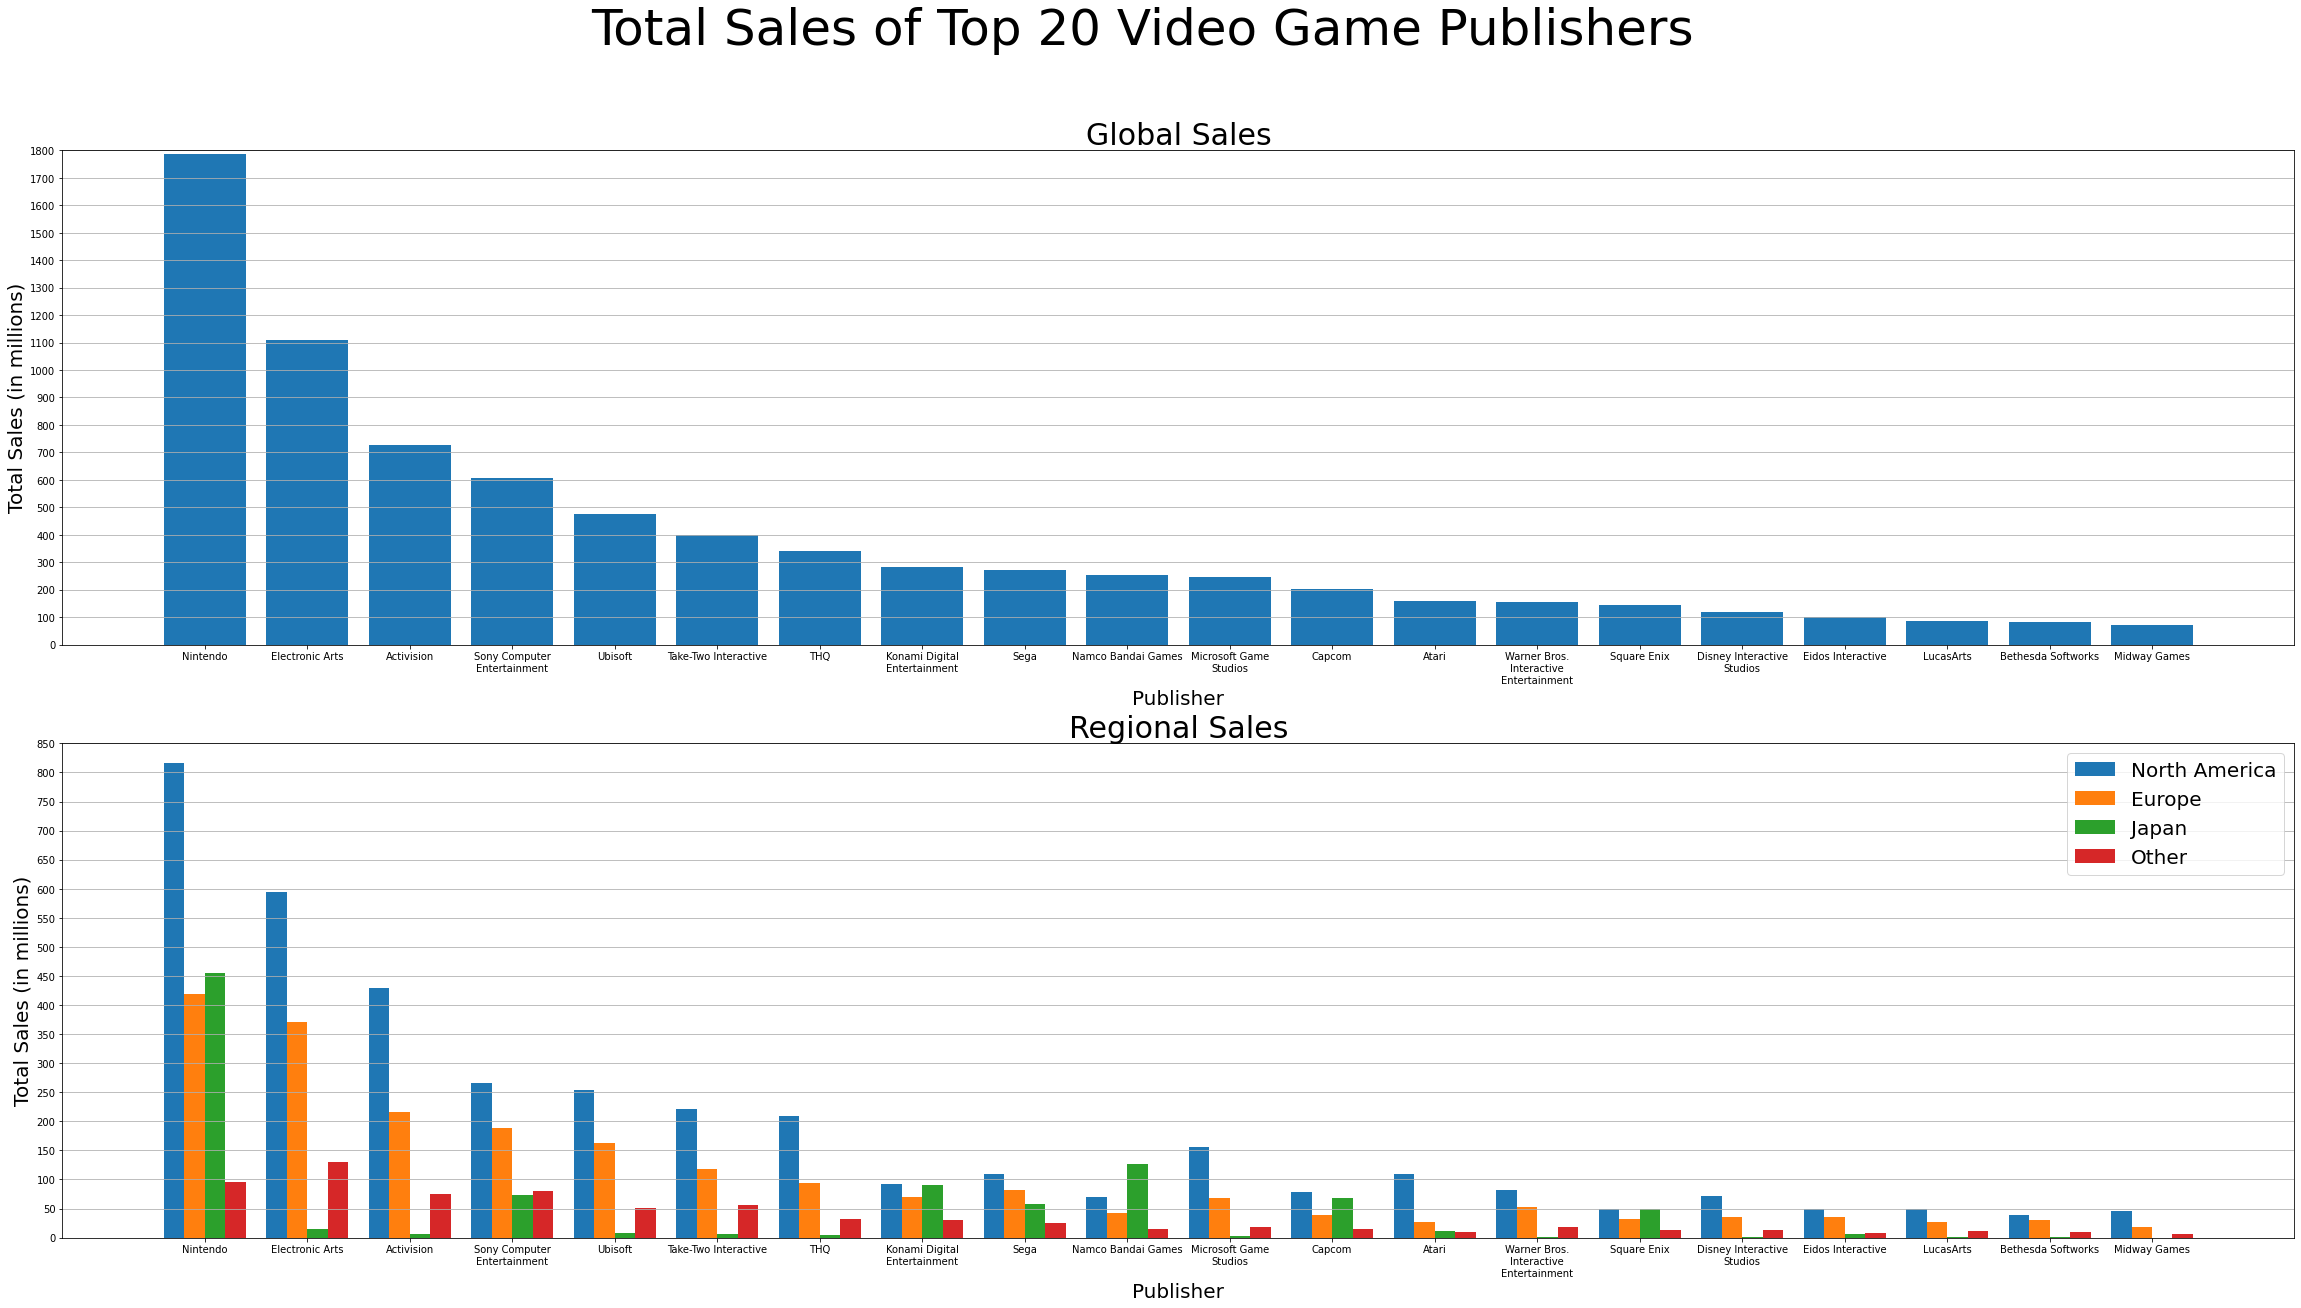

In [ ]:
###############################################
#                                             #
# Total Video Game Sales by Top 20 Publishers #
#                                             #
###############################################

# Get the 20 publishers with the largest global sales
publishers = data.groupby('Publisher')['Global_Sales'].sum().nlargest(20)

# Group by Publisher and filter the data to only show the top 20 global publishers (not local)
NA = data.groupby('Publisher')['NA_Sales'].sum()[publishers.index]
JP = data.groupby('Publisher')['JP_Sales'].sum()[publishers.index]
EU = data.groupby('Publisher')['EU_Sales'].sum()[publishers.index]
OT = data.groupby('Publisher')['Other_Sales'].sum()[publishers.index]
GL = publishers

# set width of bars to match with publishers
width = np.arange(len(publishers))

# Edit publisher names so they only have 20 characters per line
# to prevent names from overlapping each other on the graph
publishers.index = [ '\n'.join(wrap(l, 20)) for l in GL.index ]

# Two rows of graphs
fig, axs = plt.subplots(2,1, figsize=(40,20))

axs[0].bar(width, GL, 0.8, label="Global Sales")
axs[0].set_xticks(width)
axs[0].set_ylim(0,1800)
axs[0].locator_params(axis='y', nbins=20)
axs[0].set_xticklabels(publishers.index)
axs[0].set_xlabel("Publisher", size=20)
axs[0].set_ylabel("Total Sales (in millions)", size=20)
axs[0].set_title("Global Sales", size=30)
axs[0].grid(visible=True, which='major', axis='y')

axs[1].bar(width - 0.30, NA, 0.20, label = "North America")
axs[1].bar(width - 0.10, EU, 0.20, label = "Europe")
axs[1].bar(width + 0.10, JP, 0.20, label = "Japan")
axs[1].bar(width + 0.30, OT, 0.20, label = "Other")
axs[1].set_xticks(width)
axs[1].set_ylim(0,850)
axs[1].locator_params(axis='y', nbins=20)
axs[1].set_xticklabels(GL.index)
axs[1].set_xlabel("Publisher", size=20)
axs[1].set_ylabel("Total Sales (in millions)", size=20)
axs[1].set_title("Regional Sales", size=30)
axs[1].grid(visible=True, which='major', axis='y')

plt.legend(fontsize=20)
plt.suptitle("Total Sales of Top 20 Video Game Publishers", size= 50)
plt.show()

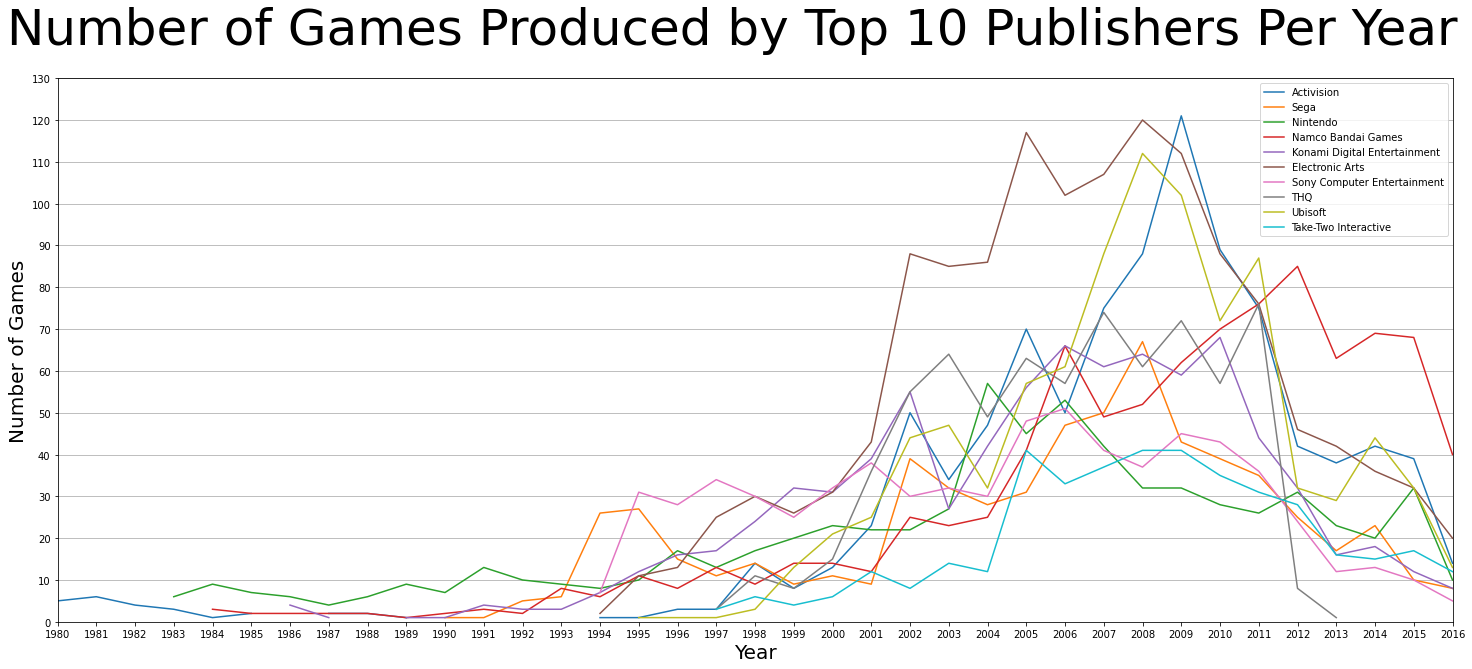

In [ ]:
###########################################################
#                                                         #
# Number of Games Produced by Top 10 Publishers Per Year  #
#                                                         #
###########################################################

# Group by Year, then Publisher
peryear = data.groupby(['Year','Publisher'], sort=True)

# Set range of years to include 1980 to 2016
years = np.arange(start=1980, stop=2017, step=1)

# Get top 10 Global Publishers
publishers = data.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

# Get all games for each year
sales = peryear.count()['Rank'].unstack()

# One graph only
fig, axs = plt.subplots(figsize=(25,10))

# Filter out all games to only ones from top 10 publishers, 
# and plot a line for each publisher
for i in list(sales):
  if i in publishers:
    axs.plot(sales.index, sales[i], label=i)
    c += 1

axs.legend()
axs.set_xticks(years)
axs.set_xlim([1980, 2016])
axs.set_ylim(0,130)
axs.locator_params(axis='y', nbins=20)
axs.locator_params(axis='x', nbins=40)
axs.set_xlabel("Year", size=20)
axs.set_ylabel("Number of Games", size=20)
axs.grid(visible=True, which='major', axis='y')

plt.suptitle('Number of Games Produced by Top 10 Publishers Per Year', size=50)
plt.show()

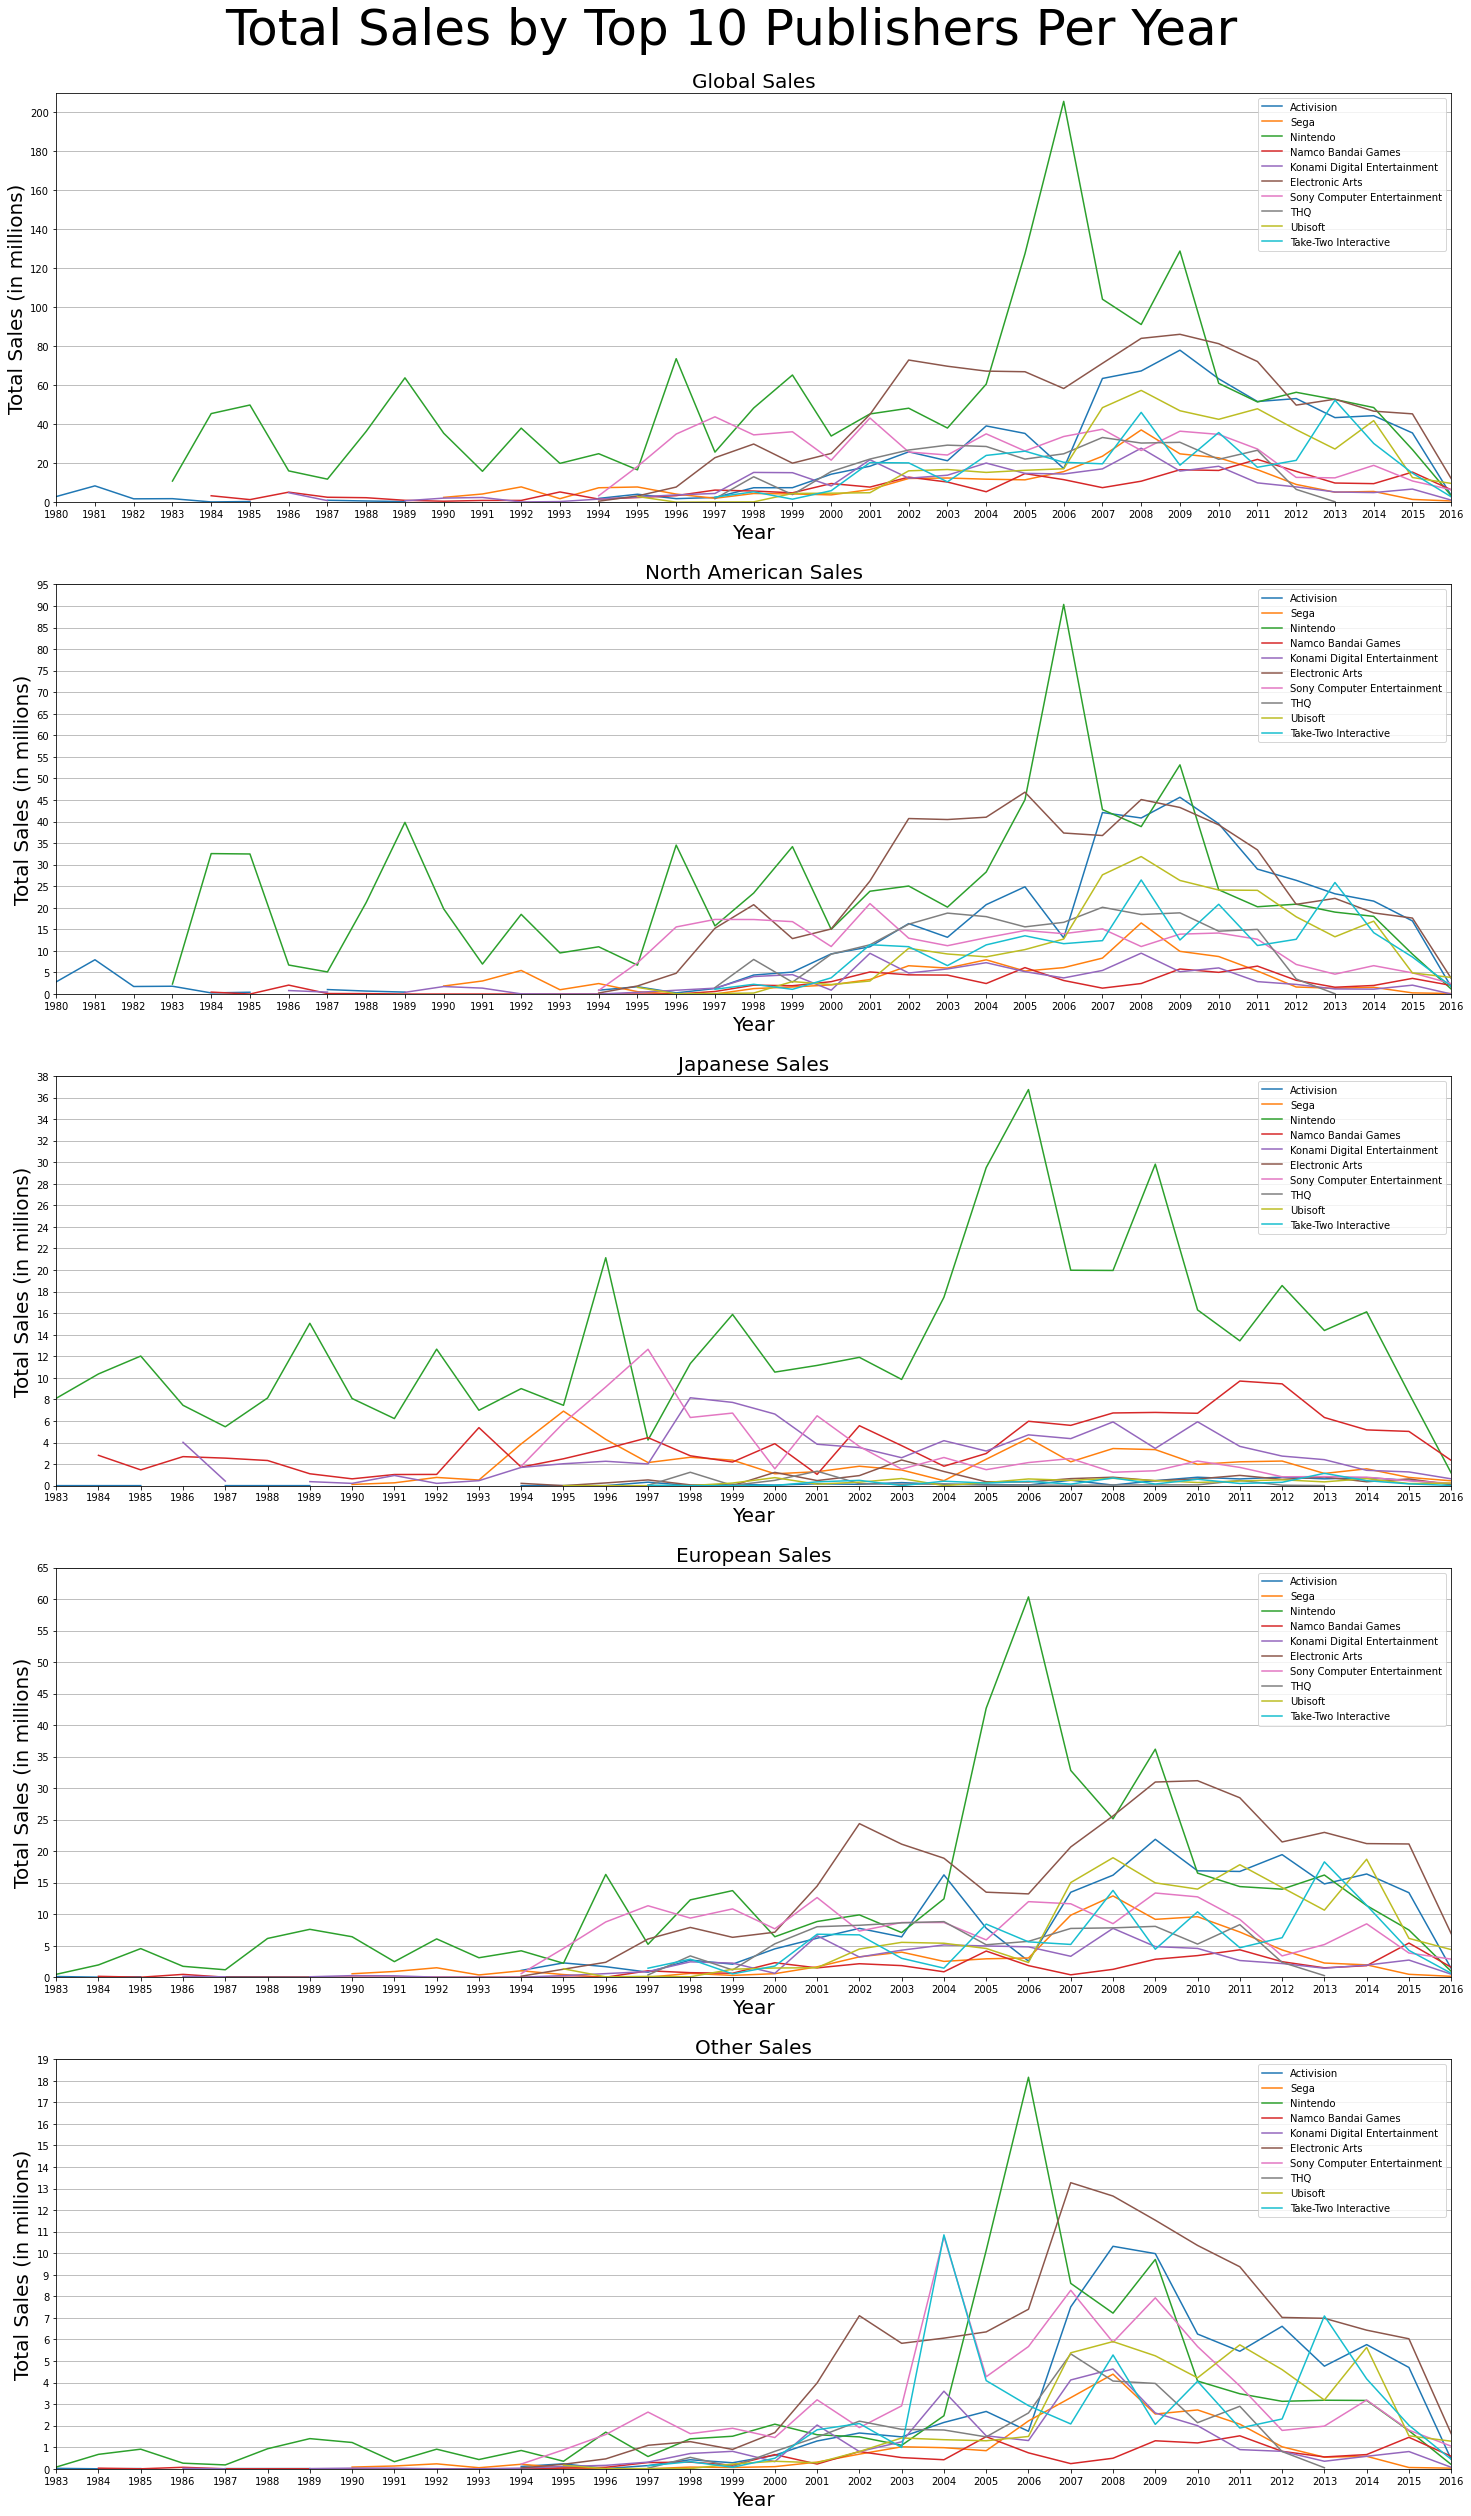

In [ ]:
#########################################################
#                                                       #
# Total Video Game Sales by Top 10 Publishers Per Year  #
#                                                       #
#########################################################

# Group by Year, then Publisher
peryear = data.groupby(['Year','Publisher'], sort=True)

# Set range of years to include 1980 to 2016
years = np.arange(start=1980, stop=2017, step=1)

# Get the 20 publishers with the largest global sales
publishers = data.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

# Get the total sales of each publisher per year, than unstack
# the data so it's in the proper structure for the plot
GL = peryear.sum()['Global_Sales'].unstack()
NA = peryear.sum()['NA_Sales'].unstack()
EU = peryear.sum()['EU_Sales'].unstack()
JP = peryear.sum()['JP_Sales'].unstack()
OT = peryear.sum()['Other_Sales'].unstack()

fig, axs = plt.subplots(5, 1, figsize=(25,40))

# Defines the colors to use for each plot per genre
GLColors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#000000', '#444444']

# Filter out all sales to only top 10 publishers, and plot 
# a line for each publisher
c = 0
for i in list(GL):
  if i in publishers:
    axs[0].plot(GL.index, GL[i], label=i)
    c += 1
axs[0].legend()
axs[0].set_xticks(years)
axs[0].set_xlim([1980, 2016])
axs[0].set_ylim(0,210)
axs[0].locator_params(axis='y', nbins=20)
axs[0].locator_params(axis='x', nbins=40)
axs[0].set_xlabel("Year", size=20)
axs[0].set_ylabel("Total Sales (in millions)", size=20)
axs[0].set_title('Global Sales', size=20)
axs[0].grid(visible=True, which='major', axis='y')

c = 0
for i in list(NA):
  if i in publishers:
    axs[1].plot(NA.index, NA[i], label=i)
    c += 1
axs[1].legend()
axs[1].set_xticks(years)
axs[1].set_xlim([1980, 2016])
axs[1].set_ylim(0,95)
axs[1].locator_params(axis='y', nbins=20)
axs[1].locator_params(axis='x', nbins=40)
axs[1].set_xlabel("Year", size=20)
axs[1].set_ylabel("Total Sales (in millions)", size=20)
axs[1].set_title('Global Sales', size=20)
axs[1].set_title('North American Sales', size=20)
axs[1].grid(visible=True, which='major', axis='y')

c = 0
for i in list(JP):
  if i in publishers:
    axs[2].plot(JP.index, JP[i], label=i)
    c += 1
axs[2].legend()
axs[2].set_xticks(years)
axs[2].set_xlim([1983, 2016])
axs[2].set_ylim(0,38)
axs[2].locator_params(axis='y', nbins=20)
axs[2].locator_params(axis='x', nbins=40)
axs[2].set_xlabel("Year", size=20)
axs[2].set_ylabel("Total Sales (in millions)", size=20)
axs[2].set_title('Global Sales', size=20)
axs[2].set_title('Japanese Sales', size=20)
axs[2].grid(visible=True, which='major', axis='y')

c = 0
for i in list(EU):
  if i in publishers:
    axs[3].plot(EU.index, EU[i], label=i)
    c += 1
axs[3].legend()
axs[3].set_xticks(years)
axs[3].set_xlim([1983, 2016])
axs[3].set_ylim(0,65)
axs[3].locator_params(axis='y', nbins=20)
axs[3].locator_params(axis='x', nbins=40)
axs[3].set_xlabel("Year", size=20)
axs[3].set_ylabel("Total Sales (in millions)", size=20)
axs[3].set_title('Global Sales', size=20)
axs[3].set_title('European Sales', size=20)
axs[3].grid(visible=True, which='major', axis='y')

c = 0
for i in list(OT):
  if i in publishers:
    axs[4].plot(OT.index, OT[i], label=i)
    c += 1
axs[4].legend()
axs[4].set_xticks(years)
axs[4].set_xlim([1983, 2016])
axs[4].set_ylim(0,19)
axs[4].locator_params(axis='y', nbins=20)
axs[4].locator_params(axis='x', nbins=40)
axs[4].set_xlabel("Year", size=20)
axs[4].set_ylabel("Total Sales (in millions)", size=20)
axs[4].set_title('Global Sales', size=20)
axs[4].set_title('Other Sales', size=20)
axs[4].grid(visible=True, which='major', axis='y')

plt.suptitle("Total Sales by Top 10 Publishers Per Year", size=50)
plt.subplots_adjust(top=0.95)
plt.show()


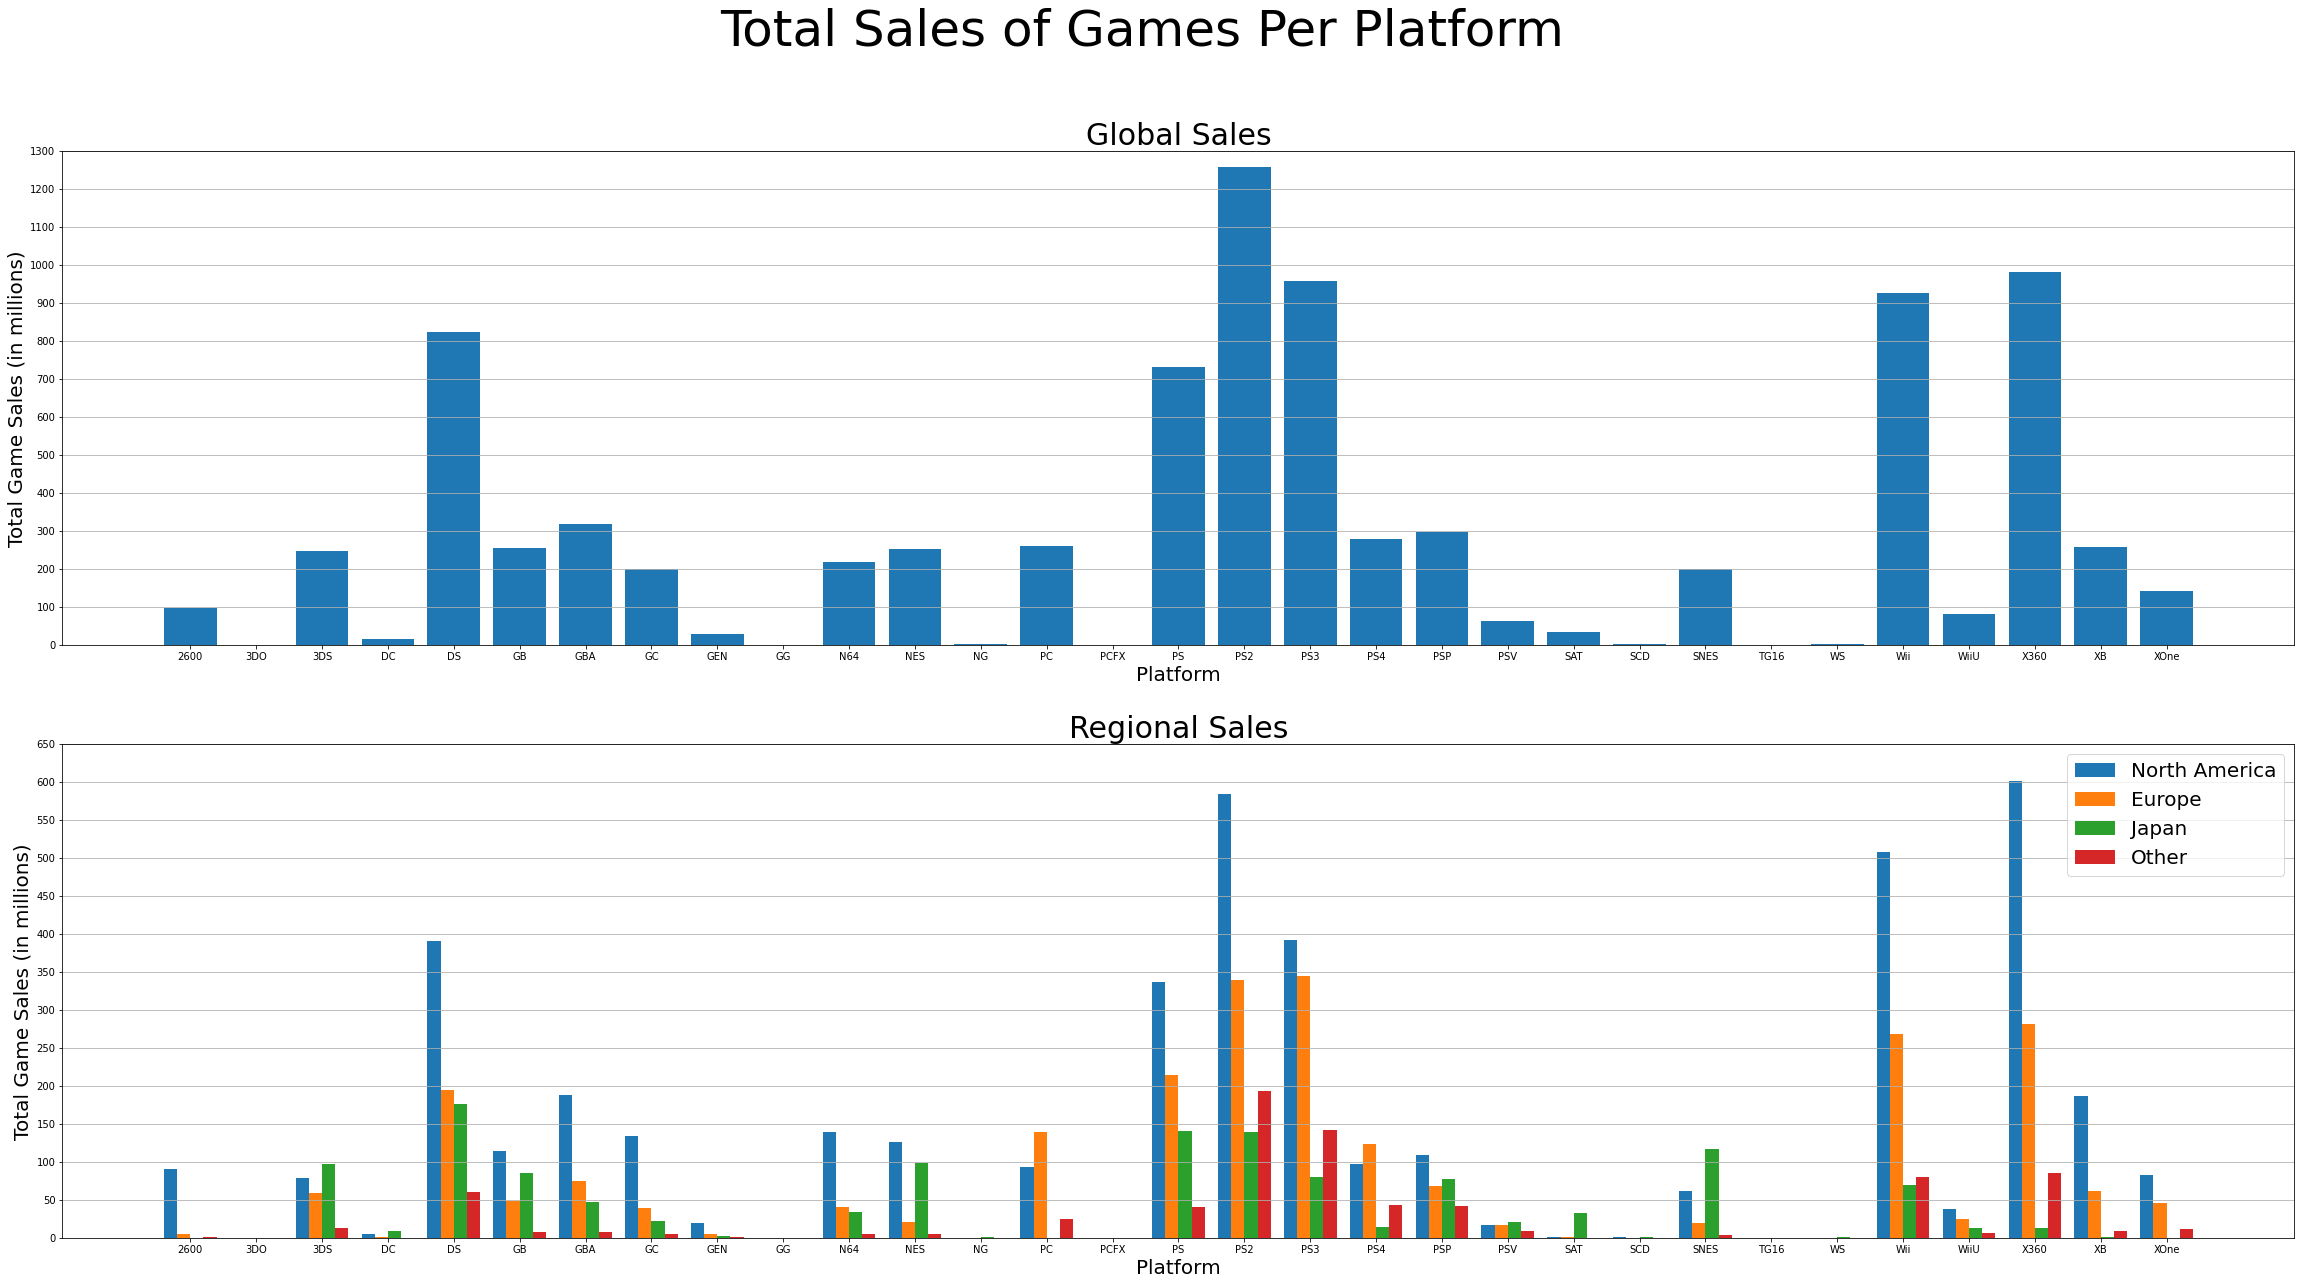

In [ ]:
#####################################
#                                   #
# Total Sales of Games Per Platform #
#                                   #
#####################################

# Get all sales for each platform per region
NA = data.groupby('Platform')['NA_Sales'].sum()
JP = data.groupby('Platform')['JP_Sales'].sum()
EU = data.groupby('Platform')['EU_Sales'].sum()
OT = data.groupby('Platform')['Other_Sales'].sum()
GL = data.groupby('Platform')['Global_Sales'].sum()

# Set width to match number of platforms
width = np.arange(len(GL))

# Two rows of graphs
fig, axs = plt.subplots(2,1, figsize=(40,20))

axs[0].bar(width, GL, 0.8, label="Global Sales")
axs[0].set_xticks(width)
axs[0].set_ylim(0,1300)
axs[0].locator_params(axis='y', nbins=20)
axs[0].set_xticklabels(GL.index)
axs[0].set_xlabel("Platform", size=20)
axs[0].set_ylabel("Total Game Sales (in millions)", size=20)
axs[0].set_title("Global Sales", size=30)
axs[0].grid(visible=True, which='major', axis='y')

axs[1].bar(width - 0.30, NA, 0.20, label = "North America")
axs[1].bar(width - 0.10, EU, 0.20, label = "Europe")
axs[1].bar(width + 0.10, JP, 0.20, label = "Japan")
axs[1].bar(width + 0.30, OT, 0.20, label = "Other")
axs[1].set_xticks(width)
axs[1].set_ylim(0,650)
axs[1].locator_params(axis='y', nbins=20)
axs[1].set_xticklabels(GL.index)
axs[1].set_xlabel("Platform", size=20)
axs[1].set_ylabel("Total Game Sales (in millions)", size=20)
axs[1].set_title("Regional Sales", size=30)
axs[1].grid(visible=True, which='major', axis='y')

plt.legend(fontsize=20)
plt.suptitle("Total Sales of Games Per Platform", size= 50)
plt.show()

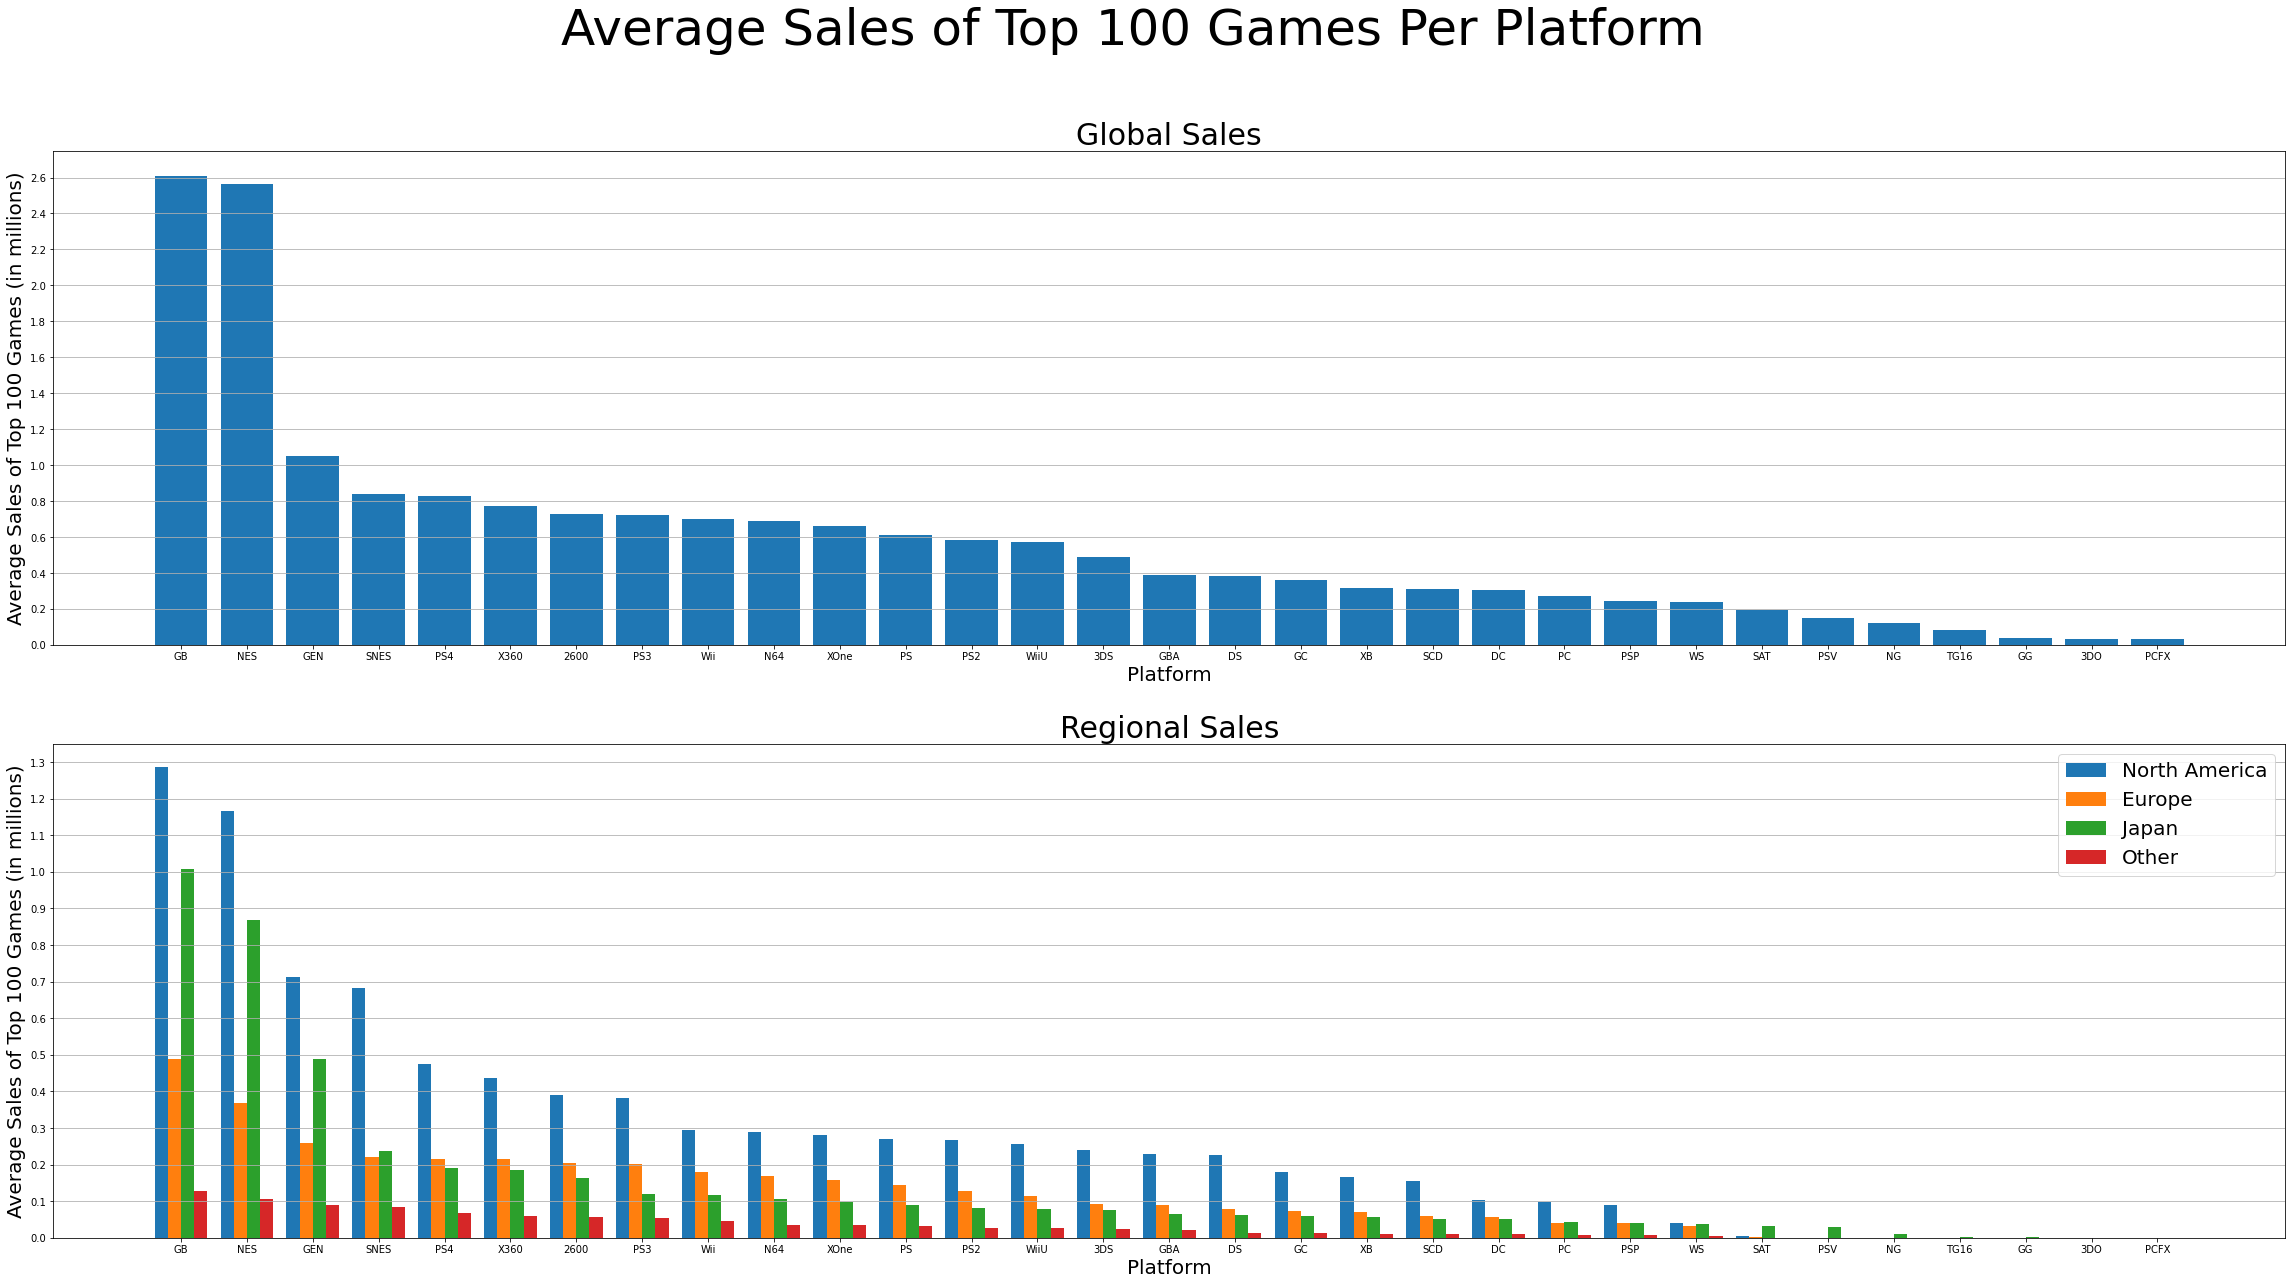

In [ ]:
###############################################
#                                             #
# Average Sales of top 100 Games Per Platform #
#                                             #
###############################################

# Get average of top 100 sales for each platform per region
NA = data.groupby('Platform')['NA_Sales'].mean().nlargest(100)
JP = data.groupby('Platform')['JP_Sales'].mean().nlargest(100)
EU = data.groupby('Platform')['EU_Sales'].mean().nlargest(100)
OT = data.groupby('Platform')['Other_Sales'].mean().nlargest(100)
GL = data.groupby('Platform')['Global_Sales'].mean().nlargest(100)

# Set width to match number of platforms
width = np.arange(len(GL))

# Two rows of graphs
fig, axs = plt.subplots(2,1, figsize=(40,20))

axs[0].bar(width, GL, 0.8, label="Global Sales")
axs[0].set_xticks(width)
axs[0].set_ylim(0,2.75)
axs[0].locator_params(axis='y', nbins=20)
axs[0].set_xticklabels(GL.index)
axs[0].set_xlabel("Platform", size=20)
axs[0].set_ylabel("Average Sales of Top 100 Games (in millions)", size=20)
axs[0].set_title("Global Sales", size=30)
axs[0].grid(visible=True, which='major', axis='y')

axs[1].bar(width - 0.30, NA, 0.20, label = "North America")
axs[1].bar(width - 0.10, EU, 0.20, label = "Europe")
axs[1].bar(width + 0.10, JP, 0.20, label = "Japan")
axs[1].bar(width + 0.30, OT, 0.20, label = "Other")
axs[1].set_xticks(width)
axs[1].set_ylim(0,1.35)
axs[1].locator_params(axis='y', nbins=20)
axs[1].set_xticklabels(GL.index)
axs[1].set_xlabel("Platform", size=20)
axs[1].set_ylabel("Average Sales of Top 100 Games (in millions)", size=20)
axs[1].set_title("Regional Sales", size=30)
axs[1].grid(visible=True, which='major', axis='y')

plt.legend(fontsize=20)
plt.suptitle("Average Sales of Top 100 Games Per Platform", size= 50)
plt.show()